In [11]:
import NN
import os
import importlib
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [36]:
importlib.reload(NN)

<module 'NN' from '/home/bouissob/Code/NN.py'>

In [17]:
#def __init__(self, Epoch = 2, Neur_seq = '32_64_64_32', Dataset_train = ['Ocean1'], 
#             Oc_mod_type = 'COM_NEMO-CNRS', Var_X = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft'], 
#             Var_Y = 'meltRate', activ_fct = 'swish', Norm_Choix = 0, verbose = 1, batch_size = 32, Extra_n = '')

In [18]:
#Test = NN.model_NN(Epoch = 1, Neur_seq = '4_2')
#Test.train()

In [19]:
#class Sequencial_training():
    #def __init__(self, Model):
    #training(self, training_extent = 1, verbose = 1, Standard_train = ['32_64_64_32'], **kwargs)

In [20]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']

In [136]:
importlib.reload(NN)
Training = NN.Sequencial_training(NN.model_NN)
#Training.Neur_seq_preview(4)

In [137]:
Training.training(training_extent = 0, verbose = 1, batch_size = 32, 
                        Dataset_train = ['Ocean1'], Epoch = 10, Var_X = Var_X2)

Projected training regiment :
 ['32_64_64_32']
Starting training for neurone : 32_64_64_32, 0/1 (Previous step : 0.000 s)
Epoch 1/10
17448/17448 [==============================] - 39s 2ms/step - loss: 0.1268 - mae: 0.1695 - mse: 0.1268 - val_loss: 0.0680 - val_mae: 0.1200 - val_mse: 0.0680
Epoch 2/10
17448/17448 [==============================] - 37s 2ms/step - loss: 0.0566 - mae: 0.1058 - mse: 0.0566 - val_loss: 0.0280 - val_mae: 0.0828 - val_mse: 0.0280
Epoch 3/10
17448/17448 [==============================] - 38s 2ms/step - loss: 0.0313 - mae: 0.0847 - mse: 0.0313 - val_loss: 0.0201 - val_mae: 0.0731 - val_mse: 0.0201
Epoch 4/10
17448/17448 [==============================] - 38s 2ms/step - loss: 0.0256 - mae: 0.0772 - mse: 0.0256 - val_loss: 0.0187 - val_mae: 0.0688 - val_mse: 0.0187
Epoch 5/10
17448/17448 [==============================] - 38s 2ms/step - loss: 0.0217 - mae: 0.0722 - mse: 0.0217 - val_loss: 0.0146 - val_mae: 0.0627 - val_mse: 0.0146
Epoch 6/10
17448/17448 [=========

In [208]:
importlib.reload(NN)
#NN.Plot_loss_model(ind = 1, Epoch = 6)

<module 'NN' from '/home/bouissob/Code/NN.py'>

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_10_N_32_64_64_32_Ch_0-1646062890_Ex_InitVar']
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_10
Starting 1/1 model Ep_10_N_32_64_64_32_Ch_0-1646062890_Ex_InitVar
[1.4996359]


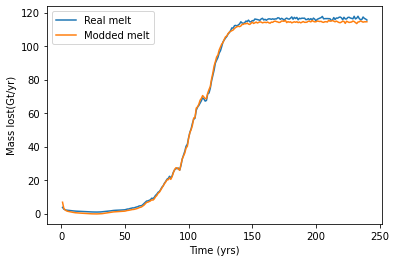

In [215]:
NN.Plot_Melt_time_function(ind = 0,save = False, Epoch = 10, message = 0, Exact = 1)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_10_N_32_64_64_32_Ch_0-1646063594_Ex_']
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_10
Starting 1/1 model Ep_10_N_32_64_64_32_Ch_0-1646063594_Ex_
[1.2579593]


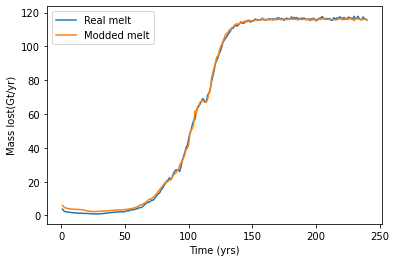

In [216]:
NN.Plot_Melt_time_function(ind = 1, save = False, Epoch = 10, message = 0, Exact = 1)

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_10_N_32_64_64_32_Ch_0-1646062890_Ex_InitVar
Data variables used : x y thermalDriving halineDriving iceDraft


(<xarray.DataArray 'meltRate' ()>
 array(-1.649315e-08),
 <xarray.DataArray 'Mod_melt' ()>
 array(-2.11050093e-08))

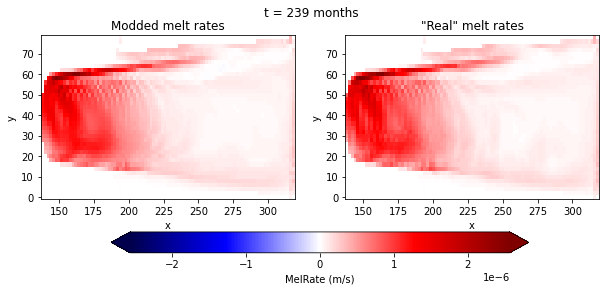

In [187]:
NN.Plotting_side_by_side(ind = 0,save = True, Epoch = 10, T = 239, Ocean_target = 'Ocean1')

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_10_N_32_64_64_32_Ch_0-1646063594_Ex_
Data variables used : x y temperatureYZ salinityYZ iceDraft


(<xarray.DataArray 'meltRate' ()>
 array(-1.649315e-08),
 <xarray.DataArray 'Mod_melt' ()>
 array(-3.2950723e-08))

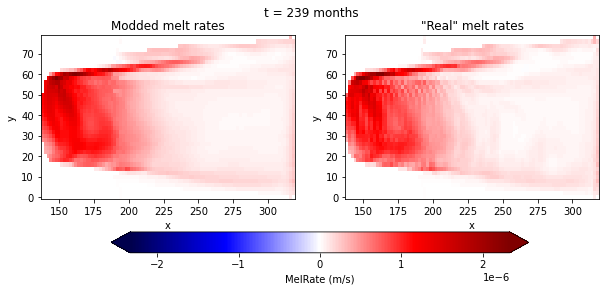

In [188]:
NN.Plotting_side_by_side(ind = 1,save = True ,Epoch = 10, T = 239, Ocean_target = 'Ocean1')

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_12


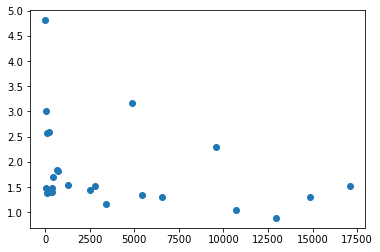

In [54]:
#def Compute_data_for_plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO-CNRS', 
#             Ocean_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS', message = 1):
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(Epoch = 12, Ocean_trained = 'Ocean1', message = 0)

## Premier cas d'overfitting observées

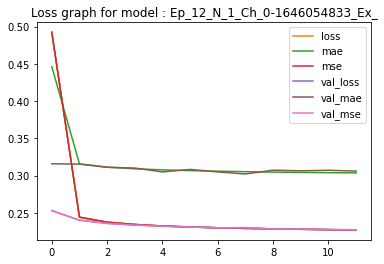

In [133]:
NN.Plot_loss_model(ind = 0, Epoch = 10, Ocean = 'Ocean1') 

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_4


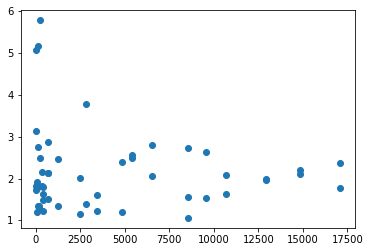

In [65]:
#def Compute_data_for_plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO-CNRS', 
#             Ocean_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS', message = 1):
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(Epoch = 4, Ocean_trained = 'Ocean1', message = 0)

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_4


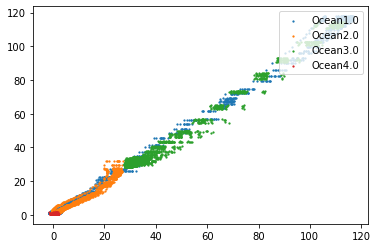

In [56]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(Epoch = 4, 
                                Ocean_trained = OcT, message = 0, Ocean_target = OcT)

In [ ]:
Epoch, Neur, Choix = re.findall('Ep_(\d+)_N_(\w+)_Ch_(\d+)', Test)[0]

In [45]:
pwd = os.getcwd()
Ocean_mod = 'Ocean1'
Type = 'COM_NEMO-CNRS'
Models_path = os.path.join(pwd, 'Auto_model', Type, Ocean_mod)
li = glob.glob(Models_path + '/Ep_4*')
Test = li[0]
MeanX, StdX = pd.read_pickle(Test + '/MeanX.pkl'), pd.read_pickle(Test + '/StdX.pkl')
MeanY, StdY = np.loadtxt(Test + '/MeanY.csv'), np.loadtxt(Test + '/StdY.csv')
model = tf.keras.models.load_model(Test + '/model_4.h5')

In [48]:
pd.read_pickle(Test + '/TrainingHistory')

{'loss': [0.0931256115436554,
  0.03765948489308357,
  0.029392534866929054,
  0.025619223713874817],
 'mae': [0.1406870037317276,
  0.0923013761639595,
  0.08241169899702072,
  0.07635173946619034],
 'mse': [0.0931256115436554,
  0.03765948489308357,
  0.029392534866929054,
  0.025619223713874817],
 'val_loss': [0.05051061883568764,
  0.02239294722676277,
  0.031140977516770363,
  0.020182712003588676],
 'val_mae': [0.10176940262317657,
  0.0795372948050499,
  0.07781242579221725,
  0.07524122297763824],
 'val_mse': [0.05051061883568764,
  0.02239294722676277,
  0.031140977516770363,
  0.020182712003588676]}